# Content

## Model Evaluation and Improvement

## Model Evaluation

### Cross-validation
#### k-fold cross-validation
- Cross-validation in sci-kit learn
- Benefits of cross-validation
- stratified k-fold cross-validation and other strategies
- More control over cross-validation
    - shuffling
#### leave one out cross validation
Used in case of small data sets
#### shuffle-split cross validation
#### cross validation with groups

## Model Improvement
### Grid Search
- Simple Grid Search
- Grid search with cross validation

### The Danger of Overfitting the Parameters and the Validation Set

### Analyzing the results of cross-validation
- search over spaces that are not grid

### Use Different cross-validation strategies with grid search
- nested cross-validation
- parallelizing cross-validation and grid search

### Evaluation Metrices and Scoring
- Explain
- Metrices for Binary Classification
    - Kinds of errors
    - Imbalanced datasets
    - Confusion matrices
- Metrices for Multiclass Classification

In [1]:
from preamble import *
%matplotlib inline

Remember, the reason we split our data into training and test sets is that we are interested in measuring how well our model generalizes to new, previously unseen data. We are not interested in how well our model fit the training set, but rather in how well it can make predictions for data that was not observed during training.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


### Cross-Validation
Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set. In cross validation, the data is instead split repeatedly and multiple models are trained. The most commonly used version of cross-validation is [k-fold cross-validation], 

#### k-fold cross validation 
k is a user-specified number, usually 5 or 10. When performing five-fold cross-validation, the data is first partitioned into five parts of (approximately) equal size, called [folds].

Next, a sequence of models is trained. The first model is trained using the first fold as the test set, and the remaining folds (2–5) are used as the training set. The model is built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then another model is built, this time using fold 2 as the test set and the data in folds 1, 3, 4, and 5 as the training set. and so on. 

For each of these five splits of the data into training and test sets, we compute the accuracy.

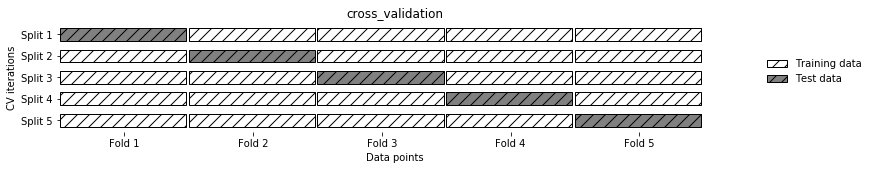

In [3]:
mglearn.plots.plot_cross_validation()

### Cross-validation in sci-kit learn

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
## Default number of folds is 5
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.967 1.    0.933 0.967 1.   ]


In [5]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


### Benifits of cross-validation
when using cross-validation, each example will be in the training set exactly once: each example is in one of the folds, and each fold is the test set once. Therefore, the model needs to generalize well to all of the samples in the dataset for all of the cross-validation scores (and their mean) to be high

Another benefit of cross-validation as compared to using a single split of the data is that we use our data more effectively. 

### Disadvantage
The main disadvantage of cross-validation is that it is computationally expensive. As we are now training k models instead of a single model, cross-validation will be roughly k times slower than doing a single split of the data

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Stratified k-fold cross-validation and other strategies
Splitting the dataset into k folds by starting with the first one-k-th part of the data, as described in the previous section, might not always be a good idea.

In stratified cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset

For example, if 90% of your samples belong to class A and 10% of your samples belong to class B, then stratified cross-validation ensures that in each fold, 90% of samples belong to class A and 10% of samples belong to class B.

It is usually a good idea to use stratified k-fold cross-validation instead of k-fold cross-validation to evaluate a classifier, because it results in more reliable estimates of generalization performance.

### Note
For regression, scikit-learn uses the standard k-fold cross-validation by default. It would be possible to also try to make each fold representative of the different values the regression target has, but this is not a commonly used strategy.

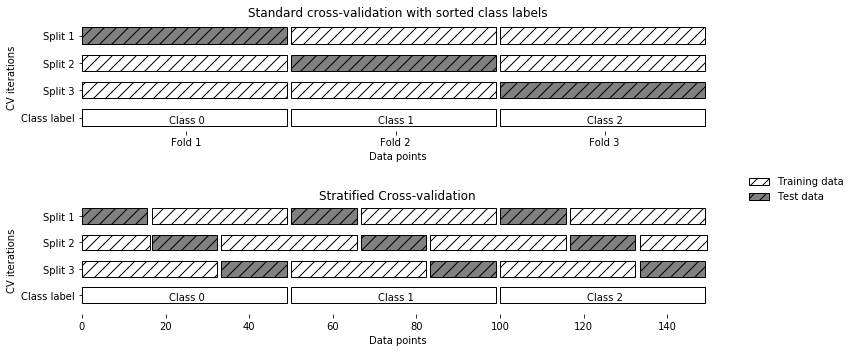

In [7]:
mglearn.plots.plot_stratified_cross_validation()

### More control over cross-validation
we want to use the standard k-fold cross-validation on a classification dataset to reproduce someone else’s results.

In [8]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.    1.    0.867 0.933 0.833]


In [9]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


### The problem in using 3 folds
each fold corresponds to one of the classes in the iris dataset, and so
nothing can be learned

### Solution
shuffle the data instead of stratifying the folds, to remove the ordering of the samples by label. We can do that by setting the shuffle parameter of KFold to True. If we shuffle the data, we also need to fix the random_state to get a reproducible shuffling. 


In [10]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


### Leave one out cross validation
you pick a single data point to be the test set. This can be very
time consuming, particularly for large datasets, but sometimes provides better estimates on small datasets:

In [11]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


### Shuffle split cross validation
In shuffle-split cross-validation, each split samples train_size many points for the training set and test_size many (disjoint) point for the test set. This splitting is repeated n_iter times

Subsampling the data in this way can be useful for experimenting with large datasets.

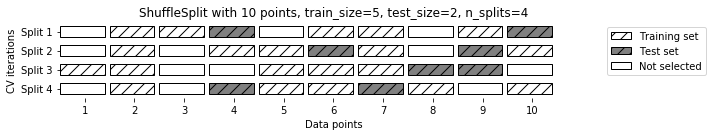

In [12]:
mglearn.plots.plot_shuffle_split()

In [13]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.96  0.947 0.92  0.987 0.933 0.96  0.973 0.947 0.987 0.96 ]


### Note
There is also a stratified variant of ShuffleSplit, aptly named StratifiedShuffleSplit, which can provide more reliable results for classification tasks.

### Cross-validation with groups
Used when there are groups in the data that are highly related.

To accurately evaluate the generalization to new dataset, we must therefore ensure that the training and test sets contain images of different people.

To achieve this, we can use GroupKFold, which takes an array of groups as argument that we can use to indicate which person is in the image. The groups array here indicates groups in the data that should not be split when creating the training and test sets, and should not be confused with the class label

#### Examples and applications
This example of groups in the data is common in medical applications, where you might have multiple samples from the same patient, but are interested in generalizing to new patients. Similarly, in speech recognition, you might have multiple recordings of the same speaker in your dataset, but are interested in recognizing speech of new speakers

In [14]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75  0.6   0.667]


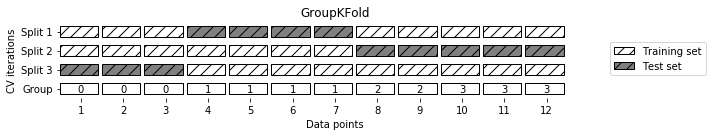

In [15]:
mglearn.plots.plot_group_kfold()

### Grid Search
we can take the next step and improve the model’s generalization performance by tuning its parameters. it is important to understand what the parameters mean before trying to adjust them. Finding the values of the important parameters of a model (the ones that provide the best generalization performance) is a tricky task.

Grid Search basically means trying all possible combinations of the
parameters of interest.

### Simple Grid Search
We can implement a simple grid search just as [for loops] over the two parameters, training and evaluating a classifier for each combination:

In [16]:
# naive grid search implementation
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=0)
print("Size of training set: {} size of test set: {}".format(
X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### The danger of overfitting the parameters and the validation set

we tried many different parameters and selected the one with best accuracy on the test set, but this accuracy won’t necessarily
carry over to new data. Because we used the test data to adjust the parameters, we can no longer use it to assess how good the model is. This is the same reason we needed to split the data into training and test sets in the first place; we need an independent
dataset to evaluate, one that was not used to create the model.
One way to resolve this problem is to split the data again, so we have three sets: 
- the training set to build the model
- the validation (or development) set to select the parameters of the model
- the test set to evaluate the performance of the selected parameters.

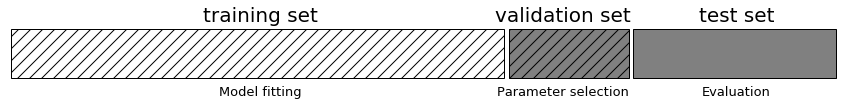

In [17]:
mglearn.plots.plot_threefold_split()

In [18]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:"
" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### Grid Search with Cross-Validation
it is quite sensitive to how exactly the data is split. For a better estimate of the generalization performance, instead of using a single split into a training and a validation set, we can use cross-validation to evaluate the performance of each parameter combination.

In [19]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

To evaluate the accuracy of the SVM using a particular setting of C and gamma using
five-fold cross-validation, we need to train 36 * 5 = 180 models. As you can imagine,
the main downside of the use of cross-validation is the time it takes to train all these
models.

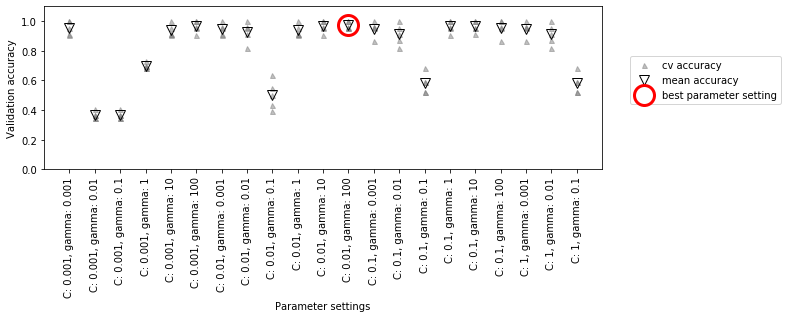

In [20]:
mglearn.plots.plot_cross_val_selection()

For each parameter setting (only a subset is shown), five accuracy values are computed, one for each split in the cross-validation. Then the mean validation accuracy is computed for each parameter setting. The parameters with the highest mean validation accuracy are chosen, marked by the circle

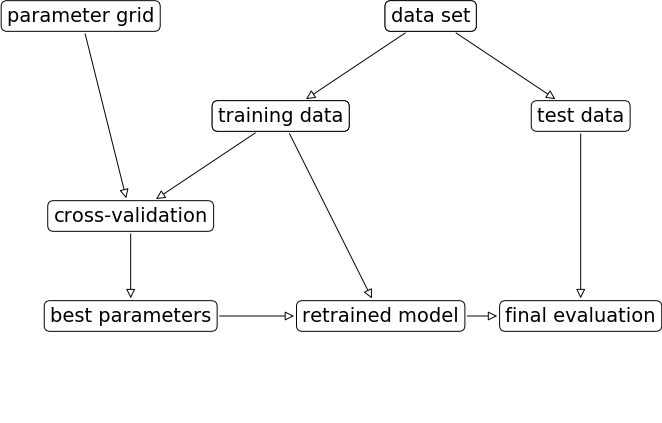

In [21]:
mglearn.plots.plot_grid_search_overview()

### Using sci-kit learn

In [22]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [24]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [25]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### Analyzing the results of cross-validation
It is often helpful to visualize the results of cross-validation, to understand how the model generalization depends on the parameters we are searching. As grid searches are quite computationally expensive to run, often it is a good idea to start with a relatively coarse and small grid

In [26]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,...,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.40e-03,7.97e-04,7.99e-04,3.99e-04,...,0.41,0.37,0.02,22
1,3.98e-04,4.88e-04,1.19e-03,9.50e-04,...,0.41,0.37,0.02,22
2,3.98e-04,4.88e-04,6.36e-04,5.24e-04,...,0.41,0.37,0.02,22
3,9.40e-04,1.73e-04,1.99e-04,3.99e-04,...,0.41,0.37,0.02,22
4,8.07e-04,1.61e-03,0.00e+00,0.00e+00,...,0.41,0.37,0.02,22


First we extract the mean validation scores, then we reshape the scores so that the axes correspond to C and gamma

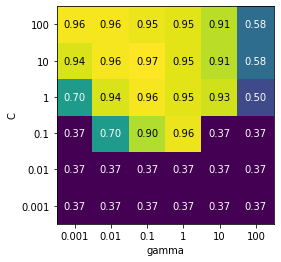

In [27]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

Each point in the heat map corresponds to one run of cross-validation, with a particular parameter setting. The color encodes the cross-validation accuracy, with light colors meaning high accuracy and dark colors meaning low accuracy. 

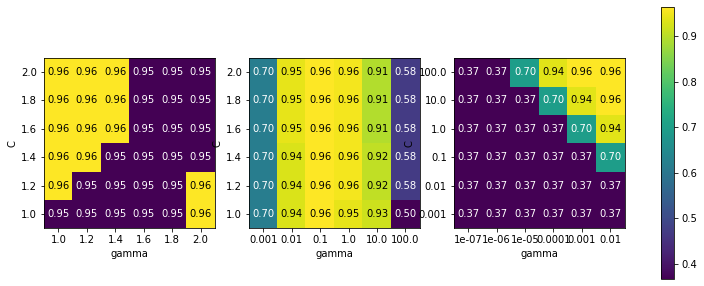

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
    scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

The first panel shows no changes at all, with a constant color over the whole parameter grid. In this case, this is caused by [improper scaling and range of the parameters C and gamma]. However, if no change in accuracy is visible over the different parameter
settings, it could also be that a parameter is just not important at all.

The second panel shows a vertical stripe pattern. This indicates that only the setting of the gamma parameter makes any difference. This could mean that the gamma parameter is searching over interesting values but the C parameter is not—or it could mean
the C parameter is not important.

The third panel shows changes in both C and gamma. However, we can see that in the entire bottom left of the plot, nothing interesting is happening. We can probably exclude the very small values from future grid searches. The optimum parameter setting is at the top right. As the optimum is in the border of the plot, we can expect that
there might be even better values beyond this border, and we might want to change our search range to include more parameters in this region

### Search over spaces that are not grid
To deal with  “conditional” parameters [some modesl contain parameters not in the other models],
GridSearchCV allows the param_grid to be a list of dictionaries. Each dictionary in the
list is expanded into an independent grid. 

In [29]:
param_grid = [{'kernel': ['rbf'],
'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
{'kernel': ['linear'],
'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In the first grid, the kernel parameter is always set to 'rbf' (not that the entry for kernel is a list of length one), and both the C and gamma parameters are varied. In the second grid, the kernel parameter is always set to linear, and only C is varied. 

In [30]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [31]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,...,38,39,40,41
mean_fit_time,0.0013,0.00086,0.00024,0.0014,...,0,0.001,0.0006,0.0002
std_fit_time,0.0006,0.00052,0.00048,0.0017,...,0,0.0016,0.00049,0.0004
mean_score_time,0.0006,0.00061,0.00082,0.00024,...,0,2.5e-05,0.0011,0.00044
std_score_time,0.00049,0.0005,0.0016,0.00049,...,0,5.1e-05,0.0015,0.00054
param_C,0.001,0.001,0.001,0.001,...,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,...,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,...,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.35,0.35,0.35,0.35,...,1,1,1,0.96
split1_test_score,0.35,0.35,0.35,0.35,...,0.91,0.96,1,0.96


### Using different cross-validation stratigies with grid stratigies
#### Nested cross-validation
instead of splitting the original data into training and test sets once, use multiple splits of cross-validation. This will result
in what is called nested cross-validation. In nested cross-validation, 
- there is an outer loop over splits of the data into training and test sets.
- For each of them, a grid search is run (which might result in different best parameters for each split in the outer loop).
- Then, for each outer split, the test set score using the best settings is reported. The result of this procedure is a list of scores—not a model,and not a parameter setting. The scores tell us how well a model generalizes, given the best parameters found by the grid. 

it can be useful for evaluating how well a given model works on a particular dataset.

In [32]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.967 1.    0.9   0.967 1.   ]
Mean cross-validation score:  0.9666666666666668


The result of our nested cross-validation can be summarized as “SVC can achieve 96% mean cross-validation accuracy on the iris dataset”—nothing more and nothing less.

you can use any combination of cross-validation strategies in the inner and outer loops.

In [33]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_parms = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
            X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [34]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.967 1.    0.967 0.967 1.   ]


### Parallelizing cross-validation and grid search
This means that building a model using a particular parameter setting on a particular cross-validation split can
be done completely independently from the other parameter settings and models

You should be aware that scikit-learn does not allow nesting of parallel operations. So, if you are using the n_jobs [number of CPU cores you want to use] option on your model (for example, a random forest), you cannot use it in GridSearchCV to search over this model. If your dataset and
model are very large, it might be that using many cores uses up too much memory, and you should monitor your memory usage when building large models in parallel.

### Evaluation Metrices and Scoring
it is important to choose the right metric when selecting between models and adjusting parameters.

- business metric

Before picking a machine learning metric, you should think about
the high-level goal of the application

- business impact

The consequences of choosing a particular algorithm for a machine learning application

When choosing a model or adjusting parameters, you should pick the model or parameter values that have the most positive influence on the business metric. Often this is hard, as assessing the business impact of a particular model might require putting it in production
in a real-life system

#### Metrices for Binary Classification
let’s have a look at the ways in which measuring accuracy might be misleading. Remember that for binary classification, we often speak of a positive class and a negative class, with the understanding that the positive class is the one we are looking for.

- kinds of error
    - An incorrect positive prediction is called a [false positive].
    - An incorrect negative prediction is called a [false negative].

In statistics, a false positive is also known as type I error, and a false negative as type II error

- Imbalanced datasets

Datasets in which one class is much more frequent than the other are often called imbalanced datasets, or datasets with imbalanced classes. In reality, imbalanced data is the norm, and it is rare that the events of interest have equal or even similar frequency in the
data.